In [2]:
import pandas as pd
matches = pd.read_csv('./data/matches.csv')
players = pd.read_csv('./data/match_players.csv')


In [3]:
# look at matches
display(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331699 entries, 0 to 1331698
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   token           1331699 non-null  object 
 1   winning_team    1331699 non-null  int64  
 2   mirror          1331699 non-null  bool   
 3   ladder          1331699 non-null  object 
 4   patch           1331699 non-null  int64  
 5   average_rating  1287122 non-null  float64
 6   map             1331699 non-null  object 
 7   map_size        1331699 non-null  object 
 8   num_players     1331699 non-null  int64  
 9   server          1331699 non-null  object 
 10  duration        1331699 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 102.9+ MB


None

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
0,HEVMmsI8GDCKKR2W,2,False,RM_1v1,35584,1180.0,hideout,tiny,2,ukwest,0:06:30
1,8a93d8306c758c0e,2,False,RM_1v1,36906,1671.0,nomad,tiny,2,westus2,0:03:39
2,1M1GiBrNTyfDdYpp,1,False,RM_TEAM,35584,1144.0,golden_pit,medium,4,brazilsouth,0:51:20
3,WqaPjpZ5YJsoF48B,1,False,RM_1v1,35584,943.0,golden_pit,tiny,2,eastus,0:37:14
4,sOZrU57m89qr0159,1,False,RM_1v1,35584,1046.0,mediterranean,tiny,2,ukwest,0:36:49


# What can we ask about matches?
- most popular maps
-- likely arabia (open) and arena (closed)
- most popular game type (ladder)
- what civs win most?
-- civ win rate vs other civs
-- civ win rate in map (arabia vs arena)
- what type of civ is better (infantry, cavalry, archer)
-- need to label civs by type manually
- in mirror matches, does the higher rated player win more often ? (probably). but we don't seem to have player rating here, just average rating
- where do people play most? (not really true as match server might not be where players are located)

# How do we subdivide data?
- by game version (patch)
- by game type (ladder)
- by player avg rating buckets
- by 1v1 games vs team games vs others (free for all)
- by region (server)
- by map type (closed maps vs open maps) - will have to manually label the maps as open/closed
- by patch

# What data might need to be cleaned?
- short duration games (someone quit) and long duration games (someone was afk)
- check null values

In [4]:
# look at matches
display(players.info())
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075552 entries, 0 to 4075551
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   token   object 
 1   match   object 
 2   rating  float64
 3   color   object 
 4   civ     object 
 5   team    int64  
 6   winner  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 190.5+ MB


None

,token,match,rating,color,civ,team,winner
0,V2X8UjSoLUliuaqg,e2ef0bbea3378df2,1295.0,Purple,Goths,1,False
1,pafasA6Xv704IbMw,4a7b1a48021eb7b5,1549.0,Blue,Berbers,2,False
2,anI0CXCPML0E8UNB,c0582c309489f1de,NaN,Cyan,Lithuanians,2,False
3,BZW0KSg7oZ4Nmoa6,d1f34eed030ca372,1183.0,Red,Mayans,1,False
4,QAX39y010pa9q2Q6,346f298b1ced01fb,1326.0,Blue,Koreans,2,True


# What can we ask about players?
- not name, because data is anonymized
- by token, we can see who won most, but that's useless perhaps
- we could see average number of games by binned ratings
- what color/civ picked most often (red/blue are defaults)

# How do we join with matches?
- We can use the match id and do a join on that dataframe

# What do we look at once we have players and the matches they played?
- Now we can actually look at which civs are best (highest win rate)




In [5]:
# What are player color preferences?
colors_df = players[~players['color'].isnull()]
# display(colors_df)
# display(len(colors_df))
color_counts = colors_df.groupby('color')['token'].count().reset_index()
color_percent = pd.DataFrame()
color_percent['color'] = color_counts['color']
color_percent['percent'] = color_counts['token']/len(colors_df)
color_percent.sort_values(by='percent', ascending=False, inplace=True)

import matplotlib.pyplot as plt


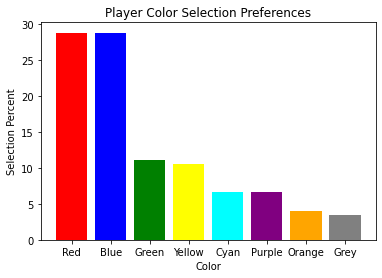

In [7]:
plt.bar(x=color_percent.color, height=color_percent.percent*100, color=color_percent.color)
plt.xlabel('Color')
plt.ylabel('Selection Percent')
plt.title('Player Color Selection Preferences')
plt.show()

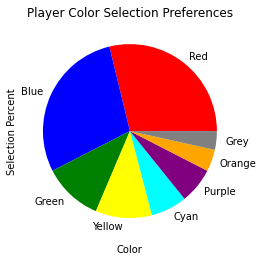

In [8]:
plt.pie(x=color_percent.percent, labels=color_percent.color, colors=color_percent.color)
plt.title('Player Color Selection Preferences')
plt.xlabel('Color')
plt.ylabel('Selection Percent')
plt.show()